# kernel density estimation

In [1]:
# python library imports

import random
import numpy as np
import matplotlib.pyplot as plt
from math import floor, exp
from lib import generate_TCL_ms, sturges_c, set_range, sezioneAureaMin
from kde import kde, k_norm, k_unif, k_para, kde_loglikelihood

In [2]:
# variables of the problem
N_evt  = 50
mean   = 2
sigma  = 7


## Punto 1

Si generi un campione Gaussiano $\{x_i\}$, con media 2 e deviazione standard 3, di 20 eventi utilizzando la tecnica del teorema centrale del limite e se ne disegni l'istogramma.

(array([0.        , 0.        , 0.        , 0.00623388, 0.00623388,
        0.00623388, 0.03740328, 0.01870164, 0.08104044, 0.03740328,
        0.01870164, 0.03740328, 0.04363716, 0.        , 0.01246776,
        0.00623388, 0.        , 0.        , 0.        ]),
 array([-28.58154146, -25.37326679, -22.16499213, -18.95671746,
        -15.74844279, -12.54016813,  -9.33189346,  -6.12361879,
         -2.91534413,   0.29293054,   3.50120521,   6.70947987,
          9.91775454,  13.12602921,  16.33430388,  19.54257854,
         22.75085321,  25.95912788,  29.16740254,  32.37567721]),
 <BarContainer object of 19 artists>)

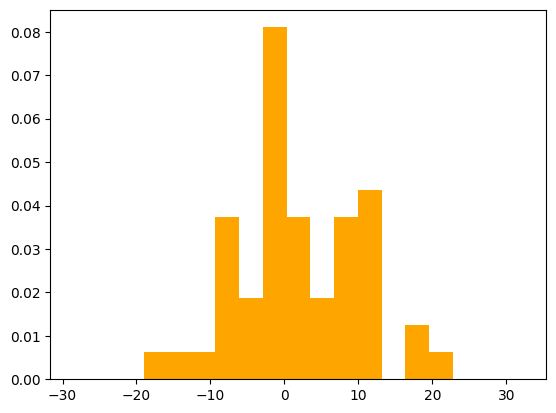

In [3]:
sample = generate_TCL_ms (mean, sigma, N_evt)

minimo, massimo = set_range (min (sample), max (sample), 0.3)
bin_edges = np.linspace (minimo, massimo, sturges_c (sample))

fig, ax = plt.subplots (nrows = 1, ncols = 1)
ax.hist (sample,
         bins = bin_edges,
         color = 'orange',
         density = True,
        )

## Punto 2

Si prepari una libreria che, a partire da un campione di eventi, una funzione $K(x)$ e un numero $h$ costruisca la pdf $\tilde{f}(x, \ {x_i\}, h)$ secondo la definizione di equazione~\ref{eq:kde} e,  con $h=1$,  se ne faccia il disegno  sovrapposto all'istogramma per il campione del punto precedente, per verificarne il funzionamento, nel caso in cui la funzione $K(x)$ sia una Gaussiana normale (cio\`e con media zero e varianza 1).

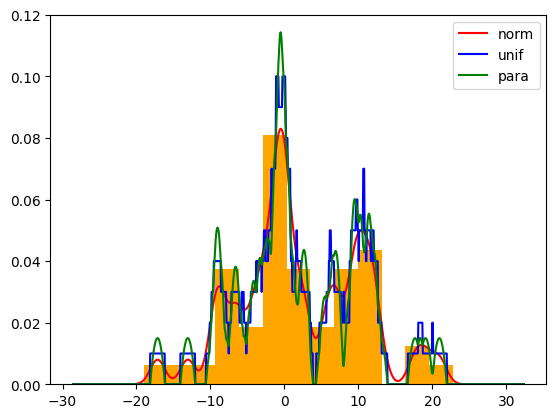

In [5]:
h = 1

x_coord = np.linspace (minimo, massimo, 1000)

f_tilde_norm = lambda x : kde (x, sample, k_norm, h)
y_coord_norm = f_tilde_norm (x_coord)

f_tilde_unif = lambda x : kde (x, sample, k_unif, h)
y_coord_unif = np.zeros_like (x_coord)
for i,x in enumerate (x_coord) : y_coord_unif[i] = f_tilde_unif (x)

f_tilde_para = lambda x : kde (x, sample, k_para, h)
y_coord_para = np.zeros_like (x_coord)
for i,x in enumerate (x_coord) : y_coord_para[i] = f_tilde_para (x)

fig, ax = plt.subplots (nrows = 1, ncols = 1)
ax.hist (sample,
         bins = bin_edges,
         color = 'orange',
         density = True,
        )
ax.plot (x_coord, y_coord_norm, color = 'red'  , label='norm')
ax.plot (x_coord, y_coord_unif, color = 'blue' , label='unif')
ax.plot (x_coord, y_coord_para, color = 'green', label='para')

ax.legend ()


# Punto 3

Se l'approssimazione funziona bene, per ogni punto $x_i$ nel campione il valore di $\tilde{f}(x_i)$ calcolato con i punti rimanenti \`e una buona approssimazione della verosimiglianza associata al campione: si scriva una funzione che ne calcola il valore e la si applichi al caso in esame.

In [6]:
print ('likelihood calcolata: ', exp (kde_loglikelihood (sample, k_norm, h)))

likelihood calcolata:  2.0510636129141166e-84


## Punto 4

Utilizzando il metodo della sezione aurea, si detetrmini il valore del parametro $h$ che massimizza la stima della verosimiglianza sviluppata nel punto precedente, scegliendo con cognizione di causa l'intervallo sul quale cercare l'estremo di interesse.
Si confronti il disegno di $\tilde{f}(x)$ con il nuovo valore del parametro $h$ con il caso $h=1$.


In [13]:
g = lambda h : -1 * kde_loglikelihood (sample, k_norm, h)

from statistics import stdev
h_ref = stdev (sample)

print ('studied range:', h_ref/5., h_ref*5.)

h_best = sezioneAureaMin (g, h_ref/5., h_ref*5, h_ref / 100.) 
print ('best h:', h_best)

studied range: 1.6653694887334605 41.634237218336516
best h: 3.079885830572472


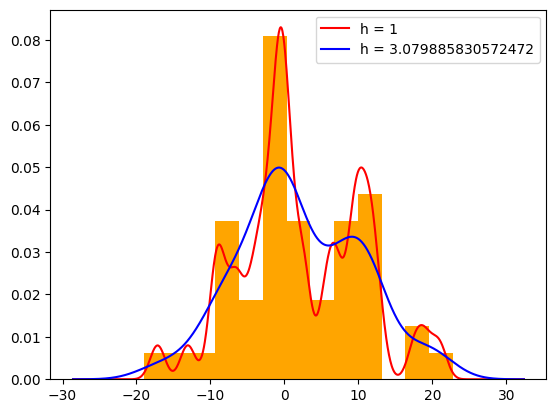

In [8]:
h = 1

f_tilde_norm_best = lambda x : kde (x, sample, k_norm, h_best)
y_coord_norm_best = f_tilde_norm_best (x_coord)

fig, ax = plt.subplots (nrows = 1, ncols = 1)
ax.hist (sample,
         bins = bin_edges,
         color = 'orange',
         density = True,
        )
ax.plot (x_coord, y_coord_norm, color = 'red'  , label='h = 1')
ax.plot (x_coord, y_coord_norm_best, color = 'blue'  , label='h = '+str(h_best))

ax.legend ()

In [9]:
g_unif = lambda h : -1 * kde_loglikelihood (sample, k_unif, h)
h_best_unif = sezioneAureaMin (g_unif, h_ref/5., h_ref*5, h_ref / 100.) 

g_para = lambda h : -1 * kde_loglikelihood (sample, k_para, h)
h_best_para = sezioneAureaMin (g_para, h_ref/5., h_ref*5, h_ref / 100.) 

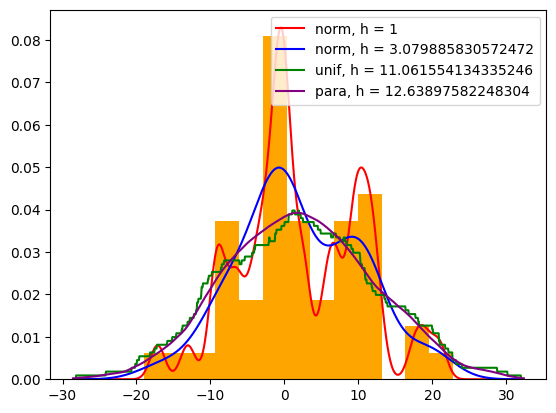

In [12]:
f_tilde_unif_best = lambda x : kde (x, sample, k_unif, h_best_unif)
y_coord_unif_best = np.zeros_like (x_coord)
for i,x in enumerate (x_coord) : y_coord_unif_best[i] = f_tilde_unif_best (x)

f_tilde_para_best = lambda x : kde (x, sample, k_para, h_best_para)
y_coord_para_best = np.zeros_like (x_coord)
for i,x in enumerate (x_coord) : y_coord_para_best[i] = f_tilde_para_best (x)

fig, ax = plt.subplots (nrows = 1, ncols = 1)
ax.hist (sample,
         bins = bin_edges,
         color = 'orange',
         density = True,
        )
ax.plot (x_coord, y_coord_norm, color = 'red'  , label='norm, h = 1')
ax.plot (x_coord, y_coord_norm_best, color = 'blue'  , label='norm, h = '+str(h_best))
ax.plot (x_coord, y_coord_unif_best, color = 'green'  , label='unif, h = '+str(h_best_unif))
ax.plot (x_coord, y_coord_para_best, color = 'purple'  , label='para, h = '+str(h_best_para))

ax.legend ()